# Lending Club借款数据分析

In [106]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#图表显示在内
%matplotlib inline

**为了整洁，去掉弹出的warning**

In [108]:
import warnings
warnings.filterwarnings('ignore')

**设置**

In [109]:
#设置精度
np.set_printoptions(precision=4) #设置输出的精度，4位小数
pd.set_option('precision',5)    #设置精度

#为了直观的显示数字，不采用科学记数法
pd.set_option('display.float_format', lambda x : '%.5f' % x)

plt.rc('figure', figsize=(10, 6))   #设置图表
sns.set(context='notebook',style="ticks",palette="GnBu_d",font_scale=1.5,font='ETBembo',rc={"figure.figsize": (10, 6)})
#最多显示20行
pd.options.display.max_rows = 20

In [110]:
data = pd.read_csv('C:\\Users\\choven\\Desktop\\LoanStats3a.csv',skiprows=0,header=1)

**查看数据行列**

In [111]:
data.shape

(42538, 145)

**head()方法默认查看前5行数据，tail()方法默认查看后5行**

In [112]:
data.head(3)

#默认查看后5行
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42533,NaN,nan,2525.00000,2525.00000,225.00000,36 months,9.33%,80.69000,B,B3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
42534,NaN,nan,6500.00000,6500.00000,0.00000,36 months,8.38%,204.84000,A,A5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
42535,NaN,nan,5000.00000,5000.00000,0.00000,36 months,7.75%,156.11000,A,A3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
42536,Total amount funded in policy code 1: 460296150,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,...,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan
42537,Total amount funded in policy code 2: 0,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,...,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan


---

可以发现，数据中包含了数值变量、分类变量等，我们首先可以利用[**dtypes**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes)
方法查看**dataframe**中各列的数据类型，

然后用[**select_dtypes**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes)
方法将数据类型进行分类，
再用[**describe**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)方法返回的统计值对数据有个初步了解。


In [113]:
set(data.dtypes)

{dtype('float64'), dtype('O')}

---

首先对于object这类非数值变量，pandas的describe方法会给出变量的：‘非空值数量’、‘unique数量’、‘最大频数变量’、‘最大频数’，为了直观的观测缺失情况，我在后面添加了‘缺失值比重'

In [114]:
data.select_dtypes(include=['O']).describe().T
'''在数据存在nan的时候，分位数无法正常显示'''
#data.select_dtypes('0').describe().T.assign(missing_pct = data.apply(lambda x : (len(x)-x.count) / len(x)))

'在数据存在nan的时候，分位数无法正常显示'

---

因为pandas的describe方法存在bug,在数据存在nan的时候，分位数无法正常显示，

要在[下一版修复](https://github.com/pandas-dev/pandas/pull/13122),所以先通过dropna后调用
[**quantile**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)来实现更详细的分位数.  

然后通过[**assign**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html)函数添加新的列

In [115]:
(data.select_dtypes(include=['float64']).describe().T)\
    .drop(['25%','50%','75%'],axis=1)\
    .assign(missing_pct=data.apply(lambda x: (len(x)-x.count())/len(x)),
           nunique = data.apply(lambda x: x.nunique()),
           pct_10=data.select_dtypes(include=['float64']).apply(lambda x: x.dropna().quantile(.1)),
           pct_25=data.select_dtypes(include=['float64']).apply(lambda x: x.dropna().quantile(.25)),
           pct_50=data.select_dtypes(include=['float64']).apply(lambda x: x.dropna().quantile(.5)),
           pct_75=data.select_dtypes(include=['float64']).apply(lambda x: x.dropna().quantile(.75)),
           pct_90=data.select_dtypes(include=['float64']).apply(lambda x: x.dropna().quantile(.9)))

,count,mean,std,min,max,missing_pct,nunique,pct_10,pct_25,pct_50,pct_75,pct_90
member_id,0.00000,nan,nan,nan,nan,1.00000,0,nan,nan,nan,nan,nan
loan_amnt,42535.00000,11089.72258,7410.93839,500.00000,35000.00000,0.00007,898,3000.00000,5200.00000,9700.00000,15000.00000,22000.00000
funded_amnt,42535.00000,10821.58575,7146.91468,500.00000,35000.00000,0.00007,1051,3000.00000,5000.00000,9600.00000,15000.00000,20400.00000
funded_amnt_inv,42535.00000,10139.83060,7131.68645,0.00000,35000.00000,0.00007,9244,2500.00000,4950.00000,8500.00000,14000.00000,20000.00000
installment,42535.00000,322.62306,208.92722,15.67000,1305.19000,0.00007,16459,98.64000,165.52000,277.69000,428.18000,622.22000
annual_inc,42531.00000,69136.55642,64096.34972,1896.00000,6000000.00000,0.00016,5597,30000.00000,40000.00000,59000.00000,82500.00000,116736.00000
url,0.00000,nan,nan,nan,nan,1.00000,0,nan,nan,nan,nan,nan
dti,42535.00000,13.37304,6.72631,0.00000,29.99000,0.00007,2894,4.06000,8.20000,13.47000,18.68000,22.43000
delinq_2yrs,42506.00000,0.15245,0.51241,0.00000,13.00000,0.00075,12,0.00000,0.00000,0.00000,0.00000,1.00000
inq_last_6mths,42506.00000,1.08142,1.52745,0.00000,33.00000,0.00075,28,0.00000,0.00000,1.00000,2.00000,3.00000


---

当然，在变量不多的情况下，更直观的可以采用盒状图来展示,  
下面选包含'num'的变量进行展示,这里有个方便的方法就是.loc[:,data.columns.str.contains('amnt')],  
其中.loc方法参数详见[链接1](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)，
.str.contains方法的参数详见[链接2](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

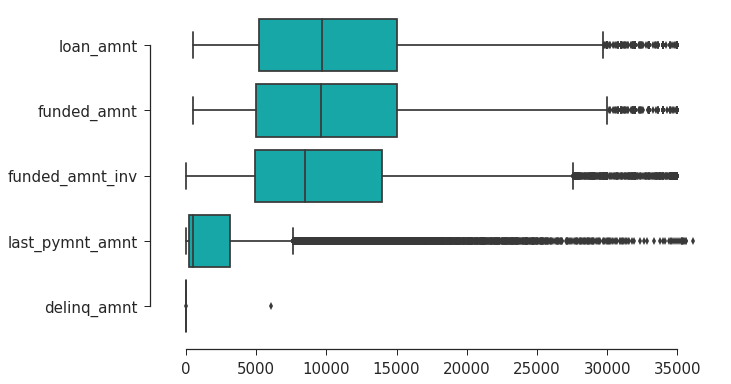

In [118]:
demo_data = data.loc[:,data.columns.str.contains('amnt')] #取包含‘amnt’的所有变量
sns.boxplot(data=demo_data,orient="h",color="c")
sns.despine(trim=True,offset=10)

---

# 基于业务层面的分析

### 选择用于分析的变量

经过前面的分析，对数据中的一些信息进行了介绍，原始数据有145个变量，从分析目的出发，将从原始数据中挑选出个变量进行分析,.loc()是pandas重要的切片方法，逗号前面是对行进行切片，这里把issue_d这个变量为空的去掉（只分析放了款的）；逗号后的为列切片，也就是挑选要分析的变量。因为LC的原始数据较为规整，所以在切片的同时做了一部分数据预处理， 比如把字符串的借款月份解析成date,把包含百分号的字符串利率转换成整型等。

In [119]:
analysis_columns=['issue_d','term','int_rate','grade','home_ownership','verification_status','purpose','loan_amnt',
                  'total_pymnt','out_prncp','total_rec_int','total_rec_prncp','installment','annual_inc','dti',
                  'fico_range_low','fico_range_high','last_fico_range_low',
                  'last_fico_range_high', 'open_acc','loan_status','delinq_amnt','acc_now_delinq','tot_coll_amt']

#.str.strip(strings)删除的是str字符串从头开始或者从尾开始带有strings含有的字符的所有字符
analysis_data = (data.loc[data.issue_d.notnull(),analysis_columns])\
                     .assign(month=lambda x: pd.to_datetime(x['issue_d']).dt.month,
                             interest_rate = lambda x:x['int_rate'].str.strip('%'),
                             fico_change = lambda x :  (x['last_fico_range_high']-x['fico_range_high']))
analysis_data.head()

,issue_d,term,int_rate,grade,home_ownership,verification_status,purpose,loan_amnt,total_pymnt,out_prncp,...,last_fico_range_low,last_fico_range_high,open_acc,loan_status,delinq_amnt,acc_now_delinq,tot_coll_amt,fico_change,interest_rate,month
0,Dec-2011,36 months,10.65%,B,RENT,Verified,credit_card,5000.00000,5863.15519,0.00000,...,nan,nan,3.00000,Fully Paid,0.00000,0.00000,nan,nan,10.65,12
1,Dec-2011,60 months,15.27%,C,RENT,Source Verified,car,2500.00000,1014.53000,0.00000,...,nan,nan,3.00000,Charged Off,0.00000,0.00000,nan,nan,15.27,12
2,Dec-2011,36 months,15.96%,C,RENT,Not Verified,small_business,2400.00000,3005.66684,0.00000,...,nan,nan,2.00000,Fully Paid,0.00000,0.00000,nan,nan,15.96,12
3,Dec-2011,36 months,13.49%,C,RENT,Source Verified,other,10000.00000,12231.89000,0.00000,...,nan,nan,10.00000,Fully Paid,0.00000,0.00000,nan,nan,13.49,12
4,Dec-2011,60 months,12.69%,B,RENT,Source Verified,other,3000.00000,4066.90816,0.00000,...,nan,nan,15.00000,Fully Paid,0.00000,0.00000,nan,nan,12.69,12


---

先看看其2016年第一季度业务开展情况，主要是放款笔数，金额，期限等情况，在Python里可以按月份groupby后通过agg()方法直接算出来  
**groupby**和**agg()** 的联合使用[方法](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

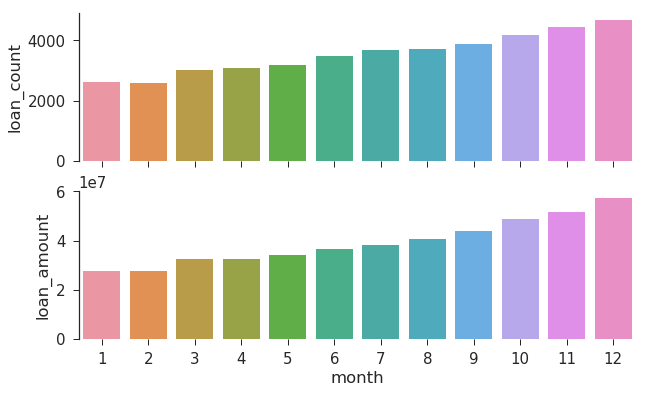

In [120]:
perform_data = analysis_data.groupby('month')['loan_amnt'].agg(['count','sum'])

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x = perform_data.index
y1 = perform_data['count']
sns.barplot(x, y1, ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("loan_count")

y2 = perform_data['sum']
sns.barplot(x, y2,ax=ax2)
ax2.set_ylabel("loan_amount")
sns.despine(bottom=True)

---

对于任何一个金融产品，金额、期限和利率都是必须了解的属性，就像去专卖店买衣服关心衣服的款式和价格  
如下是借款金额分布    [scipy.stats.norm](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.norm.html)

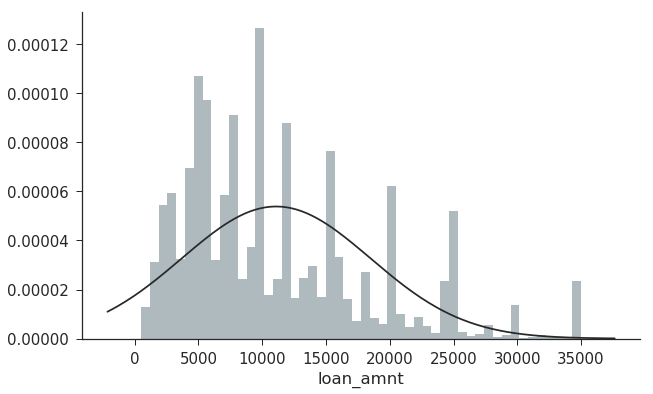

In [124]:
#一个连续的正态分布
from scipy.stats import norm

sns.distplot(analysis_data.loan_amnt,fit=norm,kde=False)
sns.despine(top=True)

---

借款期限分布，主要以36期为主。在信贷领域，借款期限是一个很好玩的东西，期限长的好处是：利率高，收益高，借款人每期还款压力要小，坏处也很明显啊：收益高的前提是借款人按期履约，不过夜长梦多，随着时间变长，尤其是当借款期限跨一个经济周期，很多人还款能力都随着经济周期在变动，经济一下行，有可能收益没实现，违约率蹭蹭往上涨  
Dataframe使用[.ploy.pie()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.pie.html)生成饼图

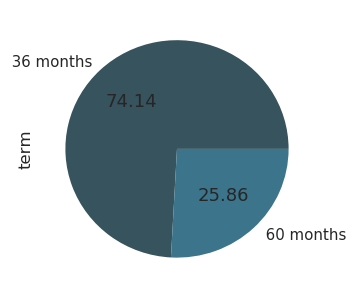

In [126]:
analysis_data.term.value_counts().plot.pie(autopct='%.2f',figsize=(5, 5))

---

借款人年收入分布

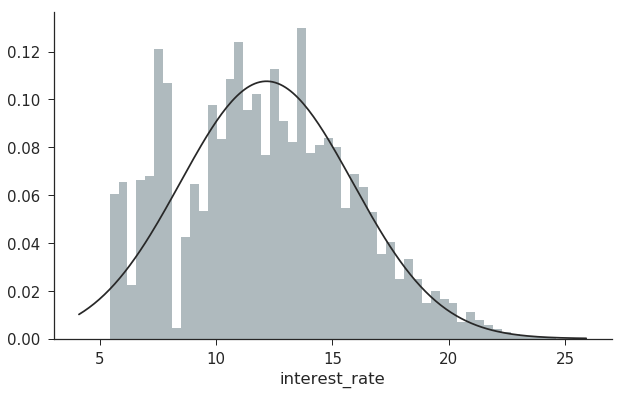

In [127]:
sns.distplot(analysis_data.interest_rate.astype(float),fit=norm,kde=False)
sns.despine(top=True)

---

借款人住房情况，有完全产权的只有12.1%，房奴占了接近一半

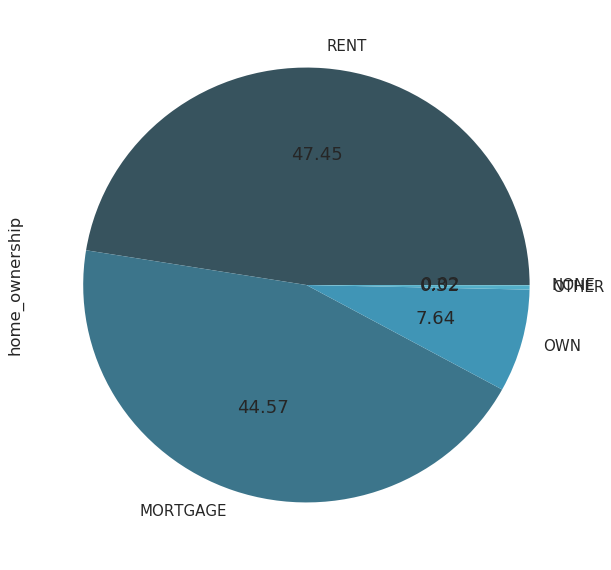

In [130]:
analysis_data.home_ownership.value_counts().plot.pie(autopct='%.2f',figsize=(10, 10))

---

贷款用途，关于debt_consolidation，理解为债务整合。

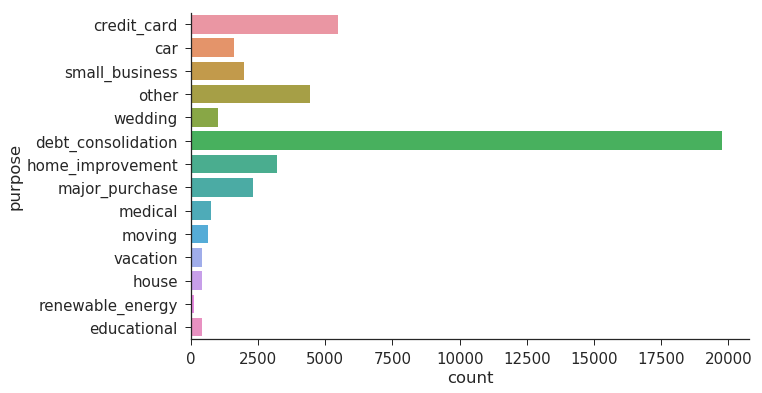

In [131]:
sns.countplot(y=analysis_data.purpose)
sns.despine(top=True)

---

**资产质量**，可以理解为在一定时期、利率、期限结构下资产所能来带的收益高低或损失可能，对于贷款来说，借款人偿还本息的及时和足额程度、借款人的信用等级、贷款的利率和期限等等都影响到资产的质量。

#### 根据month、loan_status聚合loan_amnt、out_prncp等列生成表

In [135]:
groupd_mth =  analysis_data.groupby(['month','loan_status'])

In [136]:
pay_data = groupd_mth.agg({'loan_amnt':'sum','out_prncp':'sum','total_rec_prncp':'sum','total_rec_int':'sum'}) \
                     .assign(loan_amnt_pct=lambda x : x['loan_amnt']/x.groupby(level=0)['loan_amnt'].sum(),
                              out_prncp_pct=lambda x : x['out_prncp']/x.groupby(level=0)['out_prncp'].sum())    
pay_data

total_rec_int  \
month loan_status                                                         
1     Charged Off                                          582958.04000   
      Does not meet the credit policy. Status:Charged...    96842.28000   
      Does not meet the credit policy. Status:Fully Paid   284444.56000   
      Fully Paid                                          3990342.45000   
2     Charged Off                                          610815.11000   
      Does not meet the credit policy. Status:Charged...    84562.61000   
      Does not meet the credit policy. Status:Fully Paid   342366.98000   
      Fully Paid                                          4458307.51000   
3     Charged Off                                          768656.37000   
      Does not meet the credit policy. Status:Charged...    89613.61000   
...                                                                 ...   
10    Does not meet the credit policy. Status:Fully Paid   326322.41000   
      Fully Paid                                          8469673.34000   
11    Charged Off                                         1471324.10000   
      Does not meet the credit policy. Status:Charged...   114566.00000   
      Does not meet the credit policy. Status:Fully Paid   363381.89000   
      Fully Paid                                          8155184.20000   
12    Charged Off                                         1859062.91000   
      Does not meet the credit policy. Status:Charged...    91816.82000   
      Does not meet the credit policy. Status:Fully Paid   334125.22000   
      Fully Paid                                          9693456.89000   

                                                          out_prncp  \
month loan_status                                                     
1     Charged Off                                           0.00000   
      Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
2     Charged Off                                           0.00000   
      Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
3     Charged Off                                           0.00000   
      Does not meet the credit policy. Status:Charged...    0.00000   
...                                                             ...   
10    Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
11    Charged Off                                           0.00000   
      Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
12    Charged Off                                           0.00000   
      Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   

                                                              loan_amnt  \
month loan_status                                                         
1     Charged Off                                         3570850.00000   
      Does not meet the credit policy. Status:Charged...   826300.00000   
      Does not meet the credit policy. Status:Fully Paid  1428775.00000   
      Fully Paid                                         21780725.00000   
2     Charged Off                                         3358525.00000   
      Does not meet the credit policy. Status:Charged...   653575.00000   
      Does not meet the credit policy. Status:Fully Paid  1675400.00000   
      Fully Paid       

---

#### 不同信用等级下的资产质量

查看按时还款、拖欠债务等的情况

In [137]:
past_due = ['In Grace Period','Late (16-30 days)', 'Late (31-120 days)', 'Default','Charged Off']
#拖欠债务的
delinquent = ['Late (16-30 days)', 'Late (31-120 days)', 'Default'] 
lost = ['Default']
charged_off = ['Charged Off']
analysis_data_1 = analysis_data.copy()
analysis_data_1['loan_status']  = analysis_data_1['loan_status'].map(lambda x :'Past Due' if x in past_due else x)
groupd_grade =  analysis_data_1.groupby(['grade','loan_status'])
pay_data_2 = groupd_grade.agg({'loan_amnt':'sum','out_prncp':'sum','total_rec_prncp':'sum','total_rec_int':'sum'}) \
                     .assign(loan_amnt_pct=lambda x : x['loan_amnt']/x.groupby(level=0)['loan_amnt'].sum(),
                              out_prncp_pct=lambda x : x['out_prncp']/x.groupby(level=0)['out_prncp'].sum())
pay_data_2


total_rec_int  \
grade loan_status                                                         
A     Does not meet the credit policy. Status:Charged...     3876.38000   
      Does not meet the credit policy. Status:Fully Paid    58808.74000   
      Fully Paid                                          8118504.75000   
      Past Due                                             383742.94000   
B     Does not meet the credit policy. Status:Charged...    68880.18000   
      Does not meet the credit policy. Status:Fully Paid   349048.58000   
      Fully Paid                                         20313074.49000   
      Past Due                                            2104677.23000   
C     Does not meet the credit policy. Status:Charged...   158672.59000   
      Does not meet the credit policy. Status:Fully Paid   761320.94000   
...                                                                 ...   
E     Fully Paid                                         11379047.71000   
      Past Due                                            2817227.36000   
F     Does not meet the credit policy. Status:Charged...   197454.30000   
      Does not meet the credit policy. Status:Fully Paid   439772.18000   
      Fully Paid                                          5245474.29000   
      Past Due                                            1694630.19000   
G     Does not meet the credit policy. Status:Charged...   175406.02000   
      Does not meet the credit policy. Status:Fully Paid   418897.85000   
      Fully Paid                                          1942876.87000   
      Past Due                                             471823.30000   

                                                          out_prncp  \
grade loan_status                                                     
A     Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
      Past Due                                              0.00000   
B     Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
      Past Due                                              0.00000   
C     Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
...                                                             ...   
E     Fully Paid                                            0.00000   
      Past Due                                              0.00000   
F     Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
      Past Due                                              0.00000   
G     Does not meet the credit policy. Status:Charged...    0.00000   
      Does not meet the credit policy. Status:Fully Paid    0.00000   
      Fully Paid                                            0.00000   
      Past Due                                              0.00000   

                                                               loan_amnt  \
grade loan_status                                                          
A     Does not meet the credit policy. Status:Charged...     40900.00000   
      Does not meet the credit policy. Status:Fully Paid    532800.00000   
      Fully Paid                                          82286850.00000   
      Past Due                                             4695550.00000   
B     Does not meet the credit policy. Status:Charged...    683975.00000   
      Does not meet the credit policy. Status:Fully Paid   2314900.00000   
      Fully Paid                                         118213175.00000   
      Past Due

---

In [138]:
past_due_data = pay_data_2.xs('Past Due', level=1)
past_due_data

,total_rec_int,out_prncp,loan_amnt,total_rec_prncp,loan_amnt_pct,out_prncp_pct
grade,,,,,,
A,383742.94000,0.00000,4695550.00000,2035300.00000,0.05363,nan
B,2104677.23000,0.00000,15659725.00000,5915969.47000,0.11441,nan
C,2450699.12000,0.00000,15029400.00000,5071009.59000,0.15816,nan
D,2773643.38000,0.00000,13814375.00000,4470282.40000,0.19380,nan
E,2817227.36000,0.00000,11543500.00000,3392026.16000,0.23131,nan
F,1694630.19000,0.00000,6260900.00000,1702955.67000,0.28059,nan
G,471823.30000,0.00000,1872825.00000,385288.54000,0.21401,nan


---

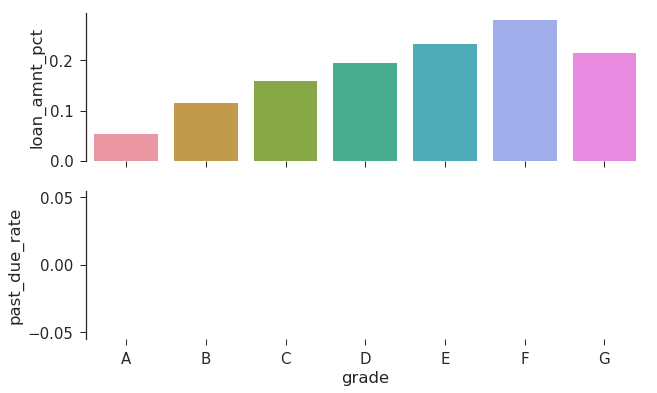

In [139]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x = past_due_data.index
y1 = past_due_data['loan_amnt_pct']
sns.barplot(x, y1, ax=ax1)
y2 = past_due_data['out_prncp_pct']
ax1.set_xlabel("")
ax1.set_ylabel("loan_amnt_pct")
sns.barplot(x, y2,ax=ax2)
ax2.set_ylabel("past_due_rate")
sns.despine(bottom=True)